In [68]:
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
print("Import of required Libraries Successfully done")

Import of required Libraries Successfully done


### Reading and Cleaning the Data Source for further analysis

In [69]:
#Reading data
df = pd.read_csv(
    r"./data/Air_Traffic_Passenger_Statistics.csv"
    # "https://data.sfgov.org/resource/rkru-6vcg.csv"
)

# convert activity period to year-month format as column Year_Month and Creating Year column
df = df.assign(
    Year_Month=pd.to_datetime(df["Activity Period"], format="%Y%m").apply(
        lambda x: x.strftime("%B-%Y")
    ),
    Year=pd.to_datetime(df["Activity Period"], format="%Y%m").dt.strftime("%Y"),
)

#cleaning the data
df["Operating Airline"] = df["Operating Airline"].str.replace(
    "United Airlines - Pre 07/01/2013", "United Airlines"
)

df.tail(1)



,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year_Month,Year
50729,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,1857,December-2022,2022


In [70]:
# creating the aggregate data of passenger data calculating the passenger count of each Airlines Year by Year 
# and retaining only top 10 of each year as df_summary

df_summary = (
    df[["Passenger Count", "Operating Airline", "Year"]]
    .groupby(["Year", "Operating Airline"])
    .agg(Passenger_Count=("Passenger Count", "sum"))
    .reset_index()
    .sort_values(["Year", "Passenger_Count"], ascending=[True, False])
    .groupby(["Year"], as_index=False, sort=False)
    .nth[:10].reset_index(drop = True)
)
df_summary.columns




Index(['Year', 'Operating Airline', 'Passenger_Count'], dtype='object')

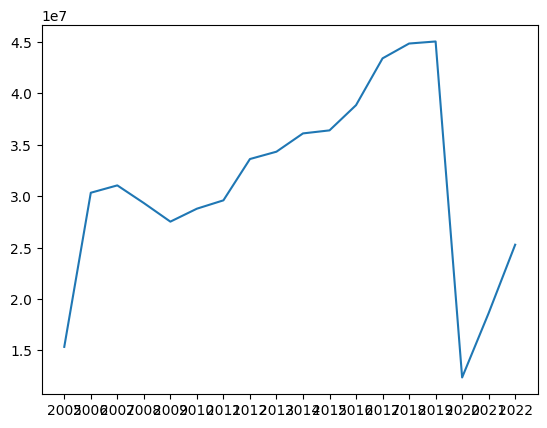

In [71]:
#Just the basic plot without any additional details for a single airlines
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
        df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'])
_ = plt.show()

Text(0, 0.5, 'Passenger Count')

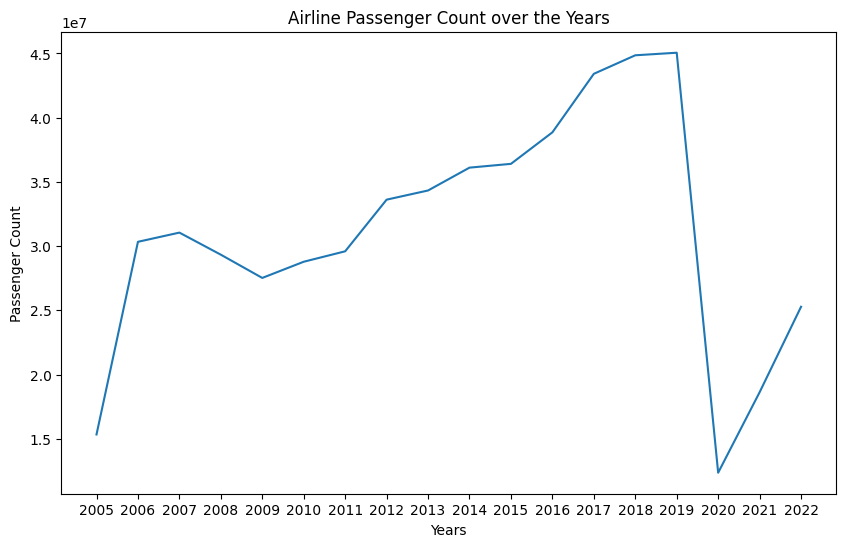

In [72]:
# Now we will add Title and labels

plt.figure(figsize=(10,6)) # to Increase the size of plot and make it bigger
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'])
plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")
_ = plt.show()



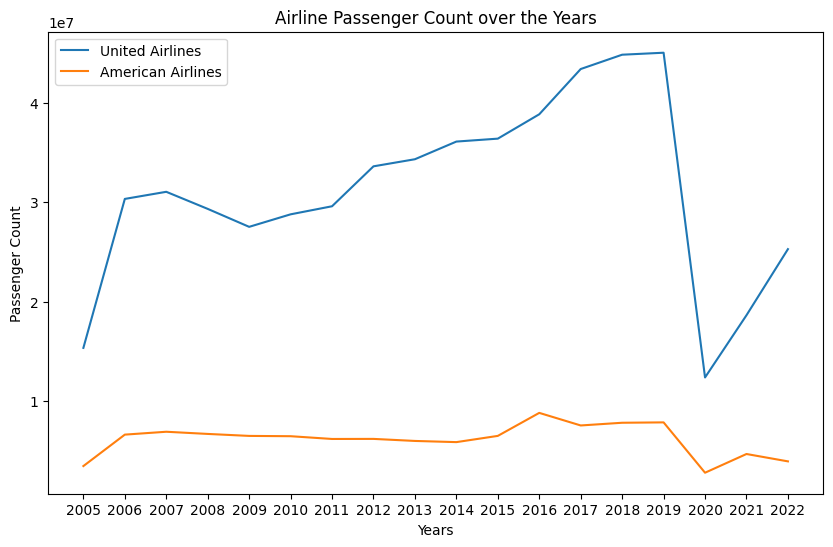

In [73]:
# Now we will add another line by adding another airlines data on the same plot.
# Also we will add label to each line so that same can be used in legend

plt.figure(figsize=(10,6)) # to Increase the size of plot and make it bigger
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'], label = "United Airlines")
plt.plot(df_summary[df_summary['Operating Airline']=='American Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='American Airlines']['Passenger_Count'], label = "American Airlines")
plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")
#label parameter within plt.plot can be used for legend
plt.legend()
_ = plt.show()